<a href="https://colab.research.google.com/github/CathyShalu/Assignment1/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
df = pd.read_csv('/content/zomato.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


In [ ]:
df.shape

(20, 21)

In [ ]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df=df.drop(['Restaurant Name','Address','Currency','Cuisines','Price range','Votes'],axis=1)
df.head()

,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text
0,50943,1,Bangalore,"BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300,Yes,Yes,No,No,4.1,Green,Very Good
1,58268,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,Yes,Yes,No,No,4.7,Dark Green,Excellent
2,51705,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,No,No,No,No,4.8,Dark Green,Excellent
3,18162866,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,1300,Yes,No,No,No,3.9,Yellow,Good
4,18407918,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,1500,No,Yes,No,No,4.2,Green,Very Good


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         20 non-null     int64  
 1   Country Code          20 non-null     int64  
 2   City                  20 non-null     object 
 3   Locality              20 non-null     object 
 4   Locality Verbose      20 non-null     object 
 5   Longitude             20 non-null     float64
 6   Latitude              20 non-null     float64
 7   Average Cost for two  20 non-null     int64  
 8   Has Table booking     20 non-null     object 
 9   Has Online delivery   20 non-null     object 
 10  Is delivering now     20 non-null     object 
 11  Switch to order menu  20 non-null     object 
 12  Aggregate rating      20 non-null     float64
 13  Rating color          20 non-null     object 
 14  Rating text           20 non-null     object 
dtypes: float64(3), int64(3), 

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(20, 15)

In [ ]:
df['Rating text'].unique()

array(['Very Good', 'Excellent', 'Good'], dtype=object)

In [ ]:
df.dropna(inplace=True)
df.head()


,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text
0,50943,1,Bangalore,"BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300,Yes,Yes,No,No,4.1,Green,Very Good
1,58268,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,Yes,Yes,No,No,4.7,Dark Green,Excellent
2,51705,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,No,No,No,No,4.8,Dark Green,Excellent
3,18162866,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,1300,Yes,No,No,No,3.9,Yellow,Good
4,18407918,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,1500,No,Yes,No,No,4.2,Green,Very Good


In [ ]:
df.rename(columns ={'approx_cost(for two people)':'cost2plate','listed_in(type)':'Type'},inplace= True)
df.head()

,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text
0,50943,1,Bangalore,"BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300,Yes,Yes,No,No,4.1,Green,Very Good
1,58268,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400,Yes,Yes,No,No,4.7,Dark Green,Excellent
2,51705,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000,No,No,No,No,4.8,Dark Green,Excellent
3,18162866,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,1300,Yes,No,No,No,3.9,Yellow,Good
4,18407918,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,1500,No,Yes,No,No,4.2,Green,Very Good


In [ ]:
df['Locality'].unique()


array(['BluPetal Hotel, Koramangala', 'Indiranagar', 'JP Nagar',
       'Koramangala 5th Block', 'Koramangala 6th Block',
       'Koramangala 7th Block', 'Marathahalli', 'New BEL Road',
       'Residency Road', 'Sarjapur Road', 'UB City'], dtype=object)

In [ ]:
df['Average Cost for two'].unique()


array([1300, 2400, 2000, 1500,  800,  600,  950, 1400,  400, 1200, 1800])

In [ ]:
def handlecomma(value):
    value =str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
df['Average Cost for two']=df['Average Cost for two'].apply(handlecomma)
df['Average Cost for two'].unique()

array([1300., 2400., 2000., 1500.,  800.,  600.,  950., 1400.,  400.,
       1200., 1800.])

In [ ]:
df.head()


,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text
0,50943,1,Bangalore,"BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300.0,Yes,Yes,No,No,4.1,Green,Very Good
1,58268,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400.0,Yes,Yes,No,No,4.7,Dark Green,Excellent
2,51705,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000.0,No,No,No,No,4.8,Dark Green,Excellent
3,18162866,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,1300.0,Yes,No,No,No,3.9,Yellow,Good
4,18407918,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,1500.0,No,Yes,No,No,4.2,Green,Very Good


In [ ]:
rest_types=df['Is delivering now'].value_counts(ascending =False)
rest_types

No    20
Name: Is delivering now, dtype: int64

In [ ]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

No    20
Name: Is delivering now, dtype: int64

In [ ]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['Is delivering now']=df['Is delivering now'].apply(handle_rest_type)
df['Is delivering now'].value_counts()

others    20
Name: Is delivering now, dtype: int64

In [ ]:
df.head()

,Restaurant ID,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text
0,50943,1,Bangalore,"BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,1300.0,Yes,Yes,others,No,4.1,Green,Very Good
1,58268,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,2400.0,Yes,Yes,others,No,4.7,Dark Green,Excellent
2,51705,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,2000.0,No,No,others,No,4.8,Dark Green,Excellent
3,18162866,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,1300.0,Yes,No,others,No,3.9,Yellow,Good
4,18407918,1,Bangalore,Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,1500.0,No,Yes,others,No,4.2,Green,Very Good


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

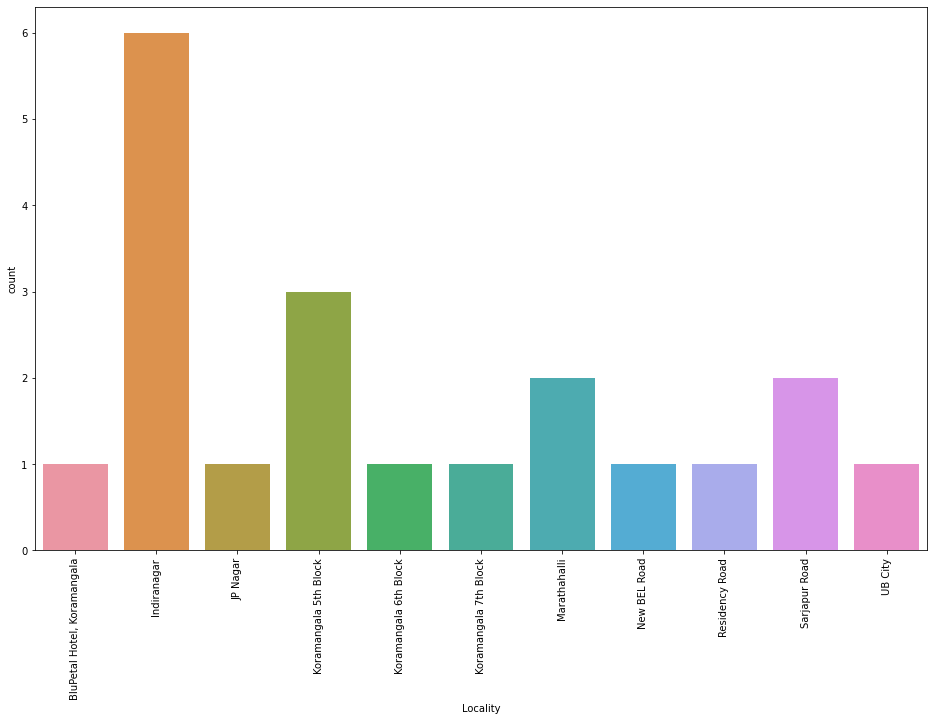

In [ ]:
plt.figure(figsize = (16,10))
ax=sns.countplot(df['Locality'])
plt.xticks(rotation=90)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


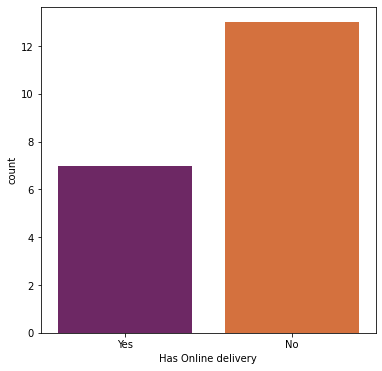

In [ ]:
plt.figure(figsize =(6,6))
sns.countplot(df['Has Online delivery'],palette='inferno')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


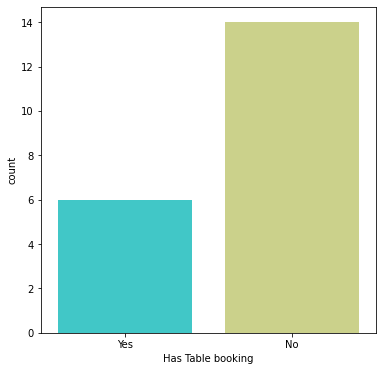

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['Has Table booking'],palette='rainbow')